In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [26]:
start = '2010-01-01'
end = '2020-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [27]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994522
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679642
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.731598
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709213


In [28]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [29]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


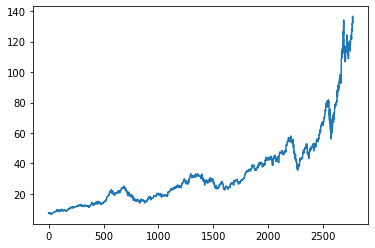

In [30]:
plt.plot(df.Close)

In [31]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2765,133.460007,131.100006,131.320007,131.970001,54930100.0
2766,137.339996,133.509995,133.990005,136.690002,124486200.0
2767,138.789993,134.339996,138.050003,134.869995,121047300.0
2768,135.990005,133.399994,135.580002,133.720001,96452100.0


In [32]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    118.223525
2766    118.489800
2767    118.699475
2768    118.925550
2769    119.125175
Name: Close, Length: 2770, dtype: float64

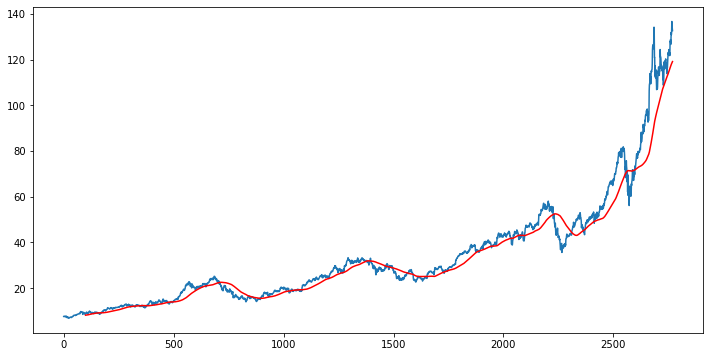

In [33]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [34]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765     99.158737
2766     99.494725
2767     99.866312
2768    100.218837
2769    100.573950
Name: Close, Length: 2770, dtype: float64

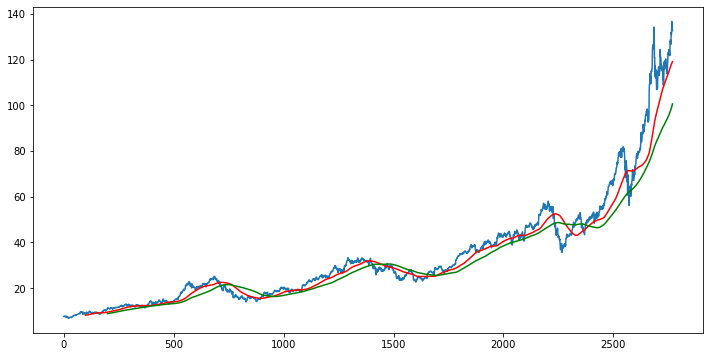

In [35]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [36]:
df.shape


(2770, 5)

In [37]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [38]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [39]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [43]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [46]:
data_training_array.shape

(1938, 1)

In [47]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [48]:
# ML Model